In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from datetime import datetime
from sklearn.preprocessing import OrdinalEncoder
#from statsmodels.graphics.tsaplots import plot_acf
from datetime import date

In [2]:
%load_ext autoreload
%matplotlib inline

-Table description:
--
-beer_train.csv - the training set
-beer_test.csv - the test set
-sampleSubmission.csv - a sample submission file in the correct format
-id_store_sku.csv - id - store_id - sku_name mapping
-sku_features.csv - SKU Features

-Feature description:
--
-Date - calendar date
-ts_id - time-series identification, each of them describe sales of one SKU at one Store
-isPromo - how many types of promotion were active on this day. 0 = no promotions, 1 = a single promotion type (for example, -price discount), 2 = two promotion types simultaneously (for example, both price discount and special placement)-
-Sales - actual sales, target
-id - identifier of rows in the submission file (the same order as in the test set). This is the key column Kaggle uses to match the test labels and your predictions. Order matters
-Store - identifier of the stores (supermarket)
-SKU - Stock Keeping Unit. Identifier of the product
-Segment - price segment of the product
-Pack - package type
-Product - type of the drink
-Brand - product's brand
-Volume - package size

In [3]:
beer_train = pd.read_csv("data/beer_train.csv")


In [4]:
beer_test = pd.read_csv("data/beer_test.csv")

In [5]:
sampleSubmission = pd.read_csv("data/sampleSubmission.csv")

In [6]:
id_store_sku = pd.read_csv("data/id_store_sku.csv")
id_store_sku.dtypes

ts_id     int64
Store    object
SKU      object
dtype: object

In [7]:
sku_features = pd.read_csv("data/sku_features.csv")

In [8]:
result = pd.merge(id_store_sku, sku_features, on="SKU")

In [9]:
final_result = pd.merge(beer_train, result, on="ts_id")
final_result

,Date,ts_id,isPromo,Sales,Store,SKU,Segment,Pack,Product,Brand,Volume
0,2015-06-15,0,0.0,0.100,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
1,2015-06-16,0,0.0,0.050,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
2,2015-06-17,0,0.0,0.200,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
3,2015-06-18,0,0.0,0.200,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
4,2015-06-19,0,0.0,0.100,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
...,...,...,...,...,...,...,...,...,...,...,...
1382316,2017-06-10,2063,0.0,0.315,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,0.45
1382317,2017-06-11,2063,0.0,0.225,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,0.45
1382318,2017-06-12,2063,0.0,0.315,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,0.45
1382319,2017-06-13,2063,0.0,0.585,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,0.45


In [10]:
final_result_test = pd.merge(beer_test, result, on="ts_id")
final_result_test

,id,Date,ts_id,isPromo,Store,SKU,Segment,Pack,Product,Brand,Volume
0,0,2017-06-15,0,0.0,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
1,1891,2017-06-16,0,0.0,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
2,3782,2017-06-17,0,0.0,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
3,5673,2017-06-18,0,0.0,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
4,7564,2017-06-19,0,0.0,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
...,...,...,...,...,...,...,...,...,...,...,...
192877,185317,2017-09-27,2063,0.0,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,0.45
192878,187208,2017-09-28,2063,0.0,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,0.45
192879,189099,2017-09-29,2063,0.0,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,0.45
192880,190990,2017-09-30,2063,0.0,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,0.45


# Visualization (EDA)

In [11]:
# Search domain knowledge
# Check if the data is intuitive
# Understand how the data was generated
# Explore individual features
# Explore pairs and groups
# Clean up features

There are 267 stores and 18 SKU in id_store_sku
There are 19 SKU in sku_features
There are 256 stores, 18 SKU, in the final join

That means that we don't have sales for 11 stores, and a beer is not sold anywhere


There are 1944 ts_id in id_store_sku
There are 1891 ts_id in beer_train and beer_test
We have 173 missing ts_id in beer_train and beer_test
We have 120 missing ts_id in id_store_sku

That means that for 53 ts_ids we don't have sales, for 120 we don't have sales either correspondance with beer/store


Date
For the train, we have 731 data points(days) for each ts_id
For the test, we have 102 data points(days) for each ts_id

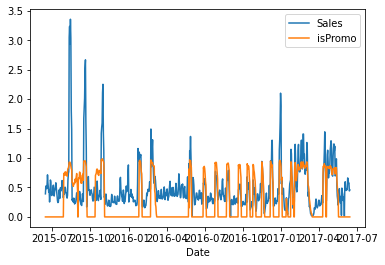

In [12]:
fr = final_result.copy(deep = True)
fr['Date'] = pd.to_datetime(final_result['Date'])

fr = fr[fr['Brand']=="Don"]
fr
res = fr.groupby(fr['Date'].dt.date).mean()  
res
plot_cols = ['Sales','isPromo']#'isPromo'
plot_features = res[plot_cols]
_ = plot_features.plot(subplots=False)

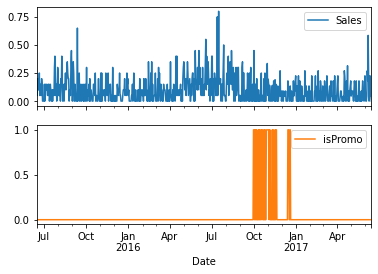

In [13]:
#Plot
ts_id0 = final_result[final_result['ts_id']==0]
date_time = pd.to_datetime(ts_id0.pop('Date'), format='%Y-%m-%d')
plot_cols = ['Sales','isPromo','Segment']
plot_features = ts_id0[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

### Effectiveness of is_Promo

PACK Can, PET, Bottle
Can : Seasonality around mid-september/begin june 2x (down) and new year/may (up)
PET : september(down)
Bottle : new year (up)

SEGMENT Premium, MainStream, High Margin
Premium : Seasonality new year (up), september/june (down)
MainStream: maybe little trend up, september/june (down) HIGH CORR WITH ISPROMO !!
High Margin: only 51 ts_id, 0 since OCT 2015, HIGH CORR WITH ISPROMO !!

PRODUCT Lager, Energy-drink, Non-alco, Other
Lager: september/june (down) new year (up)
Energy-drink: 0 since OCT 2015, GOOD CORR WITH ISPROMO !!
Non-alco: REAALLY VARIABLE,  new year (up), up in summer IS PROMO USELESS !!
Other: VERY HIGH CORR WITH ISPROMO !!

VOLUME 0.45, 0.5, 1.5
0.45: september/june (down), new year (up)
0.5: september/june (down), new year (up)
1.5: GOOD CORR WITH ISPROMO !!

STORE: TOO MANY

BRAND Carlsberg Flash Tuborg Zatecky Gus Baltika №3 Baltika №7 Baltika №9 Baltika Cooler Baltika Draught Don Firmennoe Priazovskoye
Carlsberg : HIGH CORR WITH ISPROMO !!
Flash : GOOD CORR WITH ISPROMO !!
Holsten : no data
Tuborg : GOOD CORR WITH ISPROMO !!
Zatecky Gus : GOOD CORR WITH ISPROMO !!
Baltika №3 : GOOD CORR WITH ISPROMO !!
Baltika №7 : GOOD CORR WITH ISPROMO !!
Baltika №9 : september/june (down)
Baltika Cooler : HIGH CORR WITH ISPROMO !!
Baltika Draught : HIGH CORR WITH ISPROMO !!
Don : GOOD CORR WITH ISPROMO !!
Firmennoe : GOOD CORR WITH ISPROMO !!
Priazovskoye : random

In [14]:
#TRAIN
# final_result['SegmentPromoEffectiveness']#TODO
final_result ['ProductPromoEffectiveness'] = np.where(final_result['Product'] == ("Other" or "Energy-drink"), 1, 0)
final_result ['VolumePromoEffectiveness'] = np.where(final_result['Volume'] == 1.5, 1, 0)#TODO maybe with 0.5
final_result ['BrandPromoEffectiveness'] = np.where(final_result['Brand'] != ("Baltika №9" or "Priazovskoye"), 1, 0)

#TEST
# final_result['SegmentPromoEffectiveness']#TODO
final_result_test ['ProductPromoEffectiveness'] = np.where(final_result_test['Product'] == ("Other" or "Energy-drink"), 1, 0)
final_result_test ['VolumePromoEffectiveness'] = np.where(final_result_test['Volume'] == 1.5, 1, 0)#TODO maybe with 0.5
final_result_test ['BrandPromoEffectiveness'] = np.where(final_result_test['Brand'] != ("Baltika №9" or "Priazovskoye"), 1, 0)

# Feature Engineering

### Transform into regression problem

In [15]:
#TRAIN
final_result['Year'] = pd.to_datetime(final_result['Date']).dt.year
final_result['Month'] = pd.to_datetime(final_result['Date']).dt.month
final_result['Day'] = pd.to_datetime(final_result['Date']).dt.day
final_result['Dayofweek'] = pd.to_datetime(final_result['Date']).dt.dayofweek
final_result['Week'] = pd.to_datetime(final_result['Date']).dt.isocalendar().week
final_result['Is_month_start'] = pd.to_datetime(final_result['Date']).dt.is_month_start
# #Start of month you get paid and can spend money on beers
final_result['Is_month_end'] = pd.to_datetime(final_result['Date']).dt.is_month_end
final_result['Is_year_start'] = pd.to_datetime(final_result['Date']).dt.is_year_start
final_result['Is_year_end'] = pd.to_datetime(final_result['Date']).dt.is_year_end
final_result['Is_weekend'] = np.where(final_result['Dayofweek'].isin([5,6]),1,0)
final_result['Is_weekday'] = np.where(final_result['Dayofweek'].isin([0,1,2,3,4]),1,0)

#SEASON
def get_season(date_time):
    # dummy leap year to include leap days(year-02-29) in our range
    leap_year = 2000
    seasons = [('winter', (date(leap_year, 1, 1), date(leap_year, 3, 20))),
               ('spring', (date(leap_year, 3, 21), date(leap_year, 6, 20))),
               ('summer', (date(leap_year, 6, 21), date(leap_year, 9, 22))),
               ('autumn', (date(leap_year, 9, 23), date(leap_year, 12, 20))),
               ('winter', (date(leap_year, 12, 21), date(leap_year, 12, 31)))]

    if isinstance(date_time, datetime):
        date_time = date_time.date()
    # we don't really care about the actual year so replace it with our dummy leap_year
    date_time = date_time.replace(year=leap_year)
    # return season our date falls in.
    return next(season for season, (start, end) in seasons
                if start <= date_time <= end)


# The apply method calls a function on each row
final_result['Season'] = pd.to_datetime(final_result['Date']).apply(get_season)

#BIRTHDAYS    
val = [1150200, 1137254, 1251302, 1177421, 1185114, 1242651, 1361300, 1347711, 1278152, 1312967, 1198601, 1257869]
#https://knoema.com/infographics/fjsoxbc/which-are-the-busiest-months-for-births

final_result['Birthdays'] = final_result['Month']
for x in range (1,13):
    final_result.loc[final_result['Month'] == x, 'Birthdays'] = val[x-1]/sum(val)
final_result

,Date,ts_id,isPromo,Sales,Store,SKU,Segment,Pack,Product,Brand,...,Dayofweek,Week,Is_month_start,Is_month_end,Is_year_start,Is_year_end,Is_weekend,Is_weekday,Season,Birthdays
0,2015-06-15,0,0.0,0.100,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,...,0,25,False,False,False,False,0,1,spring,0.083396
1,2015-06-16,0,0.0,0.050,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,...,1,25,False,False,False,False,0,1,spring,0.083396
2,2015-06-17,0,0.0,0.200,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,...,2,25,False,False,False,False,0,1,spring,0.083396
3,2015-06-18,0,0.0,0.200,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,...,3,25,False,False,False,False,0,1,spring,0.083396
4,2015-06-19,0,0.0,0.100,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,...,4,25,False,False,False,False,0,1,spring,0.083396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382316,2017-06-10,2063,0.0,0.315,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,...,5,23,False,False,False,False,1,0,spring,0.083396
1382317,2017-06-11,2063,0.0,0.225,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,...,6,23,False,False,False,False,1,0,spring,0.083396
1382318,2017-06-12,2063,0.0,0.315,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,...,0,24,False,False,False,False,0,1,spring,0.083396
1382319,2017-06-13,2063,0.0,0.585,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,...,1,24,False,False,False,False,0,1,spring,0.083396


### IsPromo

In [16]:
final_result['ts_promo'] = final_result['ts_id'].astype(str) + final_result['isPromo'].astype(str)
final_result['store_promo'] = final_result['Store'].astype(str) + final_result['isPromo'].astype(str)
final_result['segment_promo'] = final_result['Segment'].astype(str) + final_result['isPromo'].astype(str)
final_result['brand_promo'] = final_result['Brand'].astype(str) + final_result['isPromo'].astype(str)
final_result['sku_promo'] = final_result['SKU'].astype(str) + final_result['isPromo'].astype(str)

final_result['dom_promo'] = final_result['Day'].astype(str) + final_result['isPromo'].astype(str)
final_result['dow_promo'] = final_result['Dayofweek'].astype(str) + final_result['Dayofweek'].astype(str)

#### Holidays

In [17]:
#TODO two holidays same day

holidays2015 = pd.read_csv("data/holidays2015.csv")
holidays2016 = pd.read_csv("data/holidays2016.csv")
holidays2017 = pd.read_csv("data/holidays2017.csv")

hol_nam1 = pd.DataFrame(data=holidays2015["Name"].unique())

hol_nam2 = pd.DataFrame(data=holidays2016["Name"].unique())

hol_nam3 = pd.DataFrame(data=holidays2017["Name"].unique())

date_time1 = pd.to_datetime(holidays2015.pop('Date'), format='%d-%b')
holidays2015['Date'] = date_time1
holidays2015["Date"]=holidays2015["Date"].dt.strftime("2015-%m-%d")

date_time2 = pd.to_datetime(holidays2016.pop('Date'), format='%d-%b')
holidays2016['Date'] = date_time2
holidays2016["Date"]=holidays2016["Date"].dt.strftime("2016-%m-%d")

date_time3 = pd.to_datetime(holidays2017.pop('Date'), format='%d-%b')
holidays2017['Date'] = date_time3
holidays2017["Date"]=holidays2017["Date"].dt.strftime("2017-%m-%d")

result_holidays = pd.merge(
    hol_nam1,
    hol_nam2,
    how="outer"
)

result_holidays = pd.merge(
    result_holidays,
    hol_nam3,
    how="outer"
)
names_holidays = list(result_holidays[0])

matrix = np.zeros((len(final_result),len(names_holidays)))
holidays_df = pd.DataFrame(matrix,
                   columns=names_holidays)

final_result = final_result.join(holidays_df)

aux = 0
for index, row in final_result.iterrows():
    if row['Year']==2015:
        indexes = [i for i, e in enumerate(list(holidays2015['Date'])) if e == row['Date']]
        if indexes :
            for ind in indexes:
                final_result.at[index, holidays2015['Name'][ind]]=1
                final_result.at[index,"Holiday"] = holidays2015['Name'][ind]
        else:
            final_result.at[index, "Holiday"]="Not Holiday"

    if row['Year']==2016:
        indexes = [i for i, e in enumerate(list(holidays2016['Date'])) if e == row['Date']]
        if indexes :
            for ind in indexes:
                final_result.at[index,holidays2016['Name'][ind]]=1
                final_result.at[index, "Holiday"]=holidays2016['Name'][ind]
        else:
            final_result.at[index, "Holiday"]="Not Holiday"

    if row['Year']==2017:
        indexes = [i for i, e in enumerate(list(holidays2017['Date'])) if e == row['Date']]
        if indexes :
            for ind in indexes:
                final_result.at[index , holidays2017['Name'][ind]]=1
                final_result.at[index, "Holiday"]=holidays2017['Name'][ind]
        else:
            final_result.at[index, "Holiday"]="Not Holiday"

#     uncomment to see which rows are the ones with holidays
#         if indexes and aux < 2:
#             aux+=1
#             print(row)
#             print("-------------------------------------------")

final_result

,Date,ts_id,isPromo,Sales,Store,SKU,Segment,Pack,Product,Brand,...,Muharram,Unity Day,December Solstice,New Year Holiday Substitution,Day off for Spring and Labor Day,Day off for Russia Day,Extra holiday in lieu of Jan. 1,Extra holiday in lieu of Jan. 7,Day off for Unity Day,Holiday
0,2015-06-15,0,0.0,0.100,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Holiday
1,2015-06-16,0,0.0,0.050,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Holiday
2,2015-06-17,0,0.0,0.200,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Holiday
3,2015-06-18,0,0.0,0.200,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ramadan starts
4,2015-06-19,0,0.0,0.100,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382316,2017-06-10,2063,0.0,0.315,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Holiday
1382317,2017-06-11,2063,0.0,0.225,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Holiday
1382318,2017-06-12,2063,0.0,0.315,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Russia Day
1382319,2017-06-13,2063,0.0,0.585,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Holiday


In [18]:
final_result = final_result.drop(holidays_df,axis=1)
final_result

,Date,ts_id,isPromo,Sales,Store,SKU,Segment,Pack,Product,Brand,...,Season,Birthdays,ts_promo,store_promo,segment_promo,brand_promo,sku_promo,dom_promo,dow_promo,Holiday
0,2015-06-15,0,0.0,0.100,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,...,spring,0.083396,00.0,33010.0,Premium0.0,Baltika №30.0,"_Baltika №0 Can 0,450.0",150.0,00,Not Holiday
1,2015-06-16,0,0.0,0.050,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,...,spring,0.083396,00.0,33010.0,Premium0.0,Baltika №30.0,"_Baltika №0 Can 0,450.0",160.0,11,Not Holiday
2,2015-06-17,0,0.0,0.200,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,...,spring,0.083396,00.0,33010.0,Premium0.0,Baltika №30.0,"_Baltika №0 Can 0,450.0",170.0,22,Not Holiday
3,2015-06-18,0,0.0,0.200,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,...,spring,0.083396,00.0,33010.0,Premium0.0,Baltika №30.0,"_Baltika №0 Can 0,450.0",180.0,33,Ramadan starts
4,2015-06-19,0,0.0,0.100,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,...,spring,0.083396,00.0,33010.0,Premium0.0,Baltika №30.0,"_Baltika №0 Can 0,450.0",190.0,44,Not Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382316,2017-06-10,2063,0.0,0.315,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,...,spring,0.083396,20630.0,Q0960.0,MainStream0.0,Baltika №90.0,"_Baltika №9 Can 0,450.0",100.0,55,Not Holiday
1382317,2017-06-11,2063,0.0,0.225,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,...,spring,0.083396,20630.0,Q0960.0,MainStream0.0,Baltika №90.0,"_Baltika №9 Can 0,450.0",110.0,66,Not Holiday
1382318,2017-06-12,2063,0.0,0.315,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,...,spring,0.083396,20630.0,Q0960.0,MainStream0.0,Baltika №90.0,"_Baltika №9 Can 0,450.0",120.0,00,Russia Day
1382319,2017-06-13,2063,0.0,0.585,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,...,spring,0.083396,20630.0,Q0960.0,MainStream0.0,Baltika №90.0,"_Baltika №9 Can 0,450.0",130.0,11,Not Holiday


In [19]:
#TEST SET
final_result_test['Year'] = pd.to_datetime(final_result_test['Date']).dt.year
final_result_test['Month'] = pd.to_datetime(final_result_test['Date']).dt.month
final_result_test['Day'] = pd.to_datetime(final_result_test['Date']).dt.day
final_result_test['Dayofweek'] = pd.to_datetime(final_result_test['Date']).dt.dayofweek
final_result_test['Week'] = pd.to_datetime(final_result_test['Date']).dt.isocalendar().week
final_result_test['Is_month_start'] = pd.to_datetime(final_result_test['Date']).dt.is_month_start
# #Start of month you get paid and can spend money on beers
final_result_test['Is_month_end'] = pd.to_datetime(final_result_test['Date']).dt.is_month_end
final_result_test['Is_year_start'] = pd.to_datetime(final_result_test['Date']).dt.is_year_start
final_result_test['Is_year_end'] = pd.to_datetime(final_result_test['Date']).dt.is_year_end
final_result_test['Is_weekend'] = np.where(final_result_test['Dayofweek'].isin([5,6]),1,0)
final_result_test['Is_weekday'] = np.where(final_result_test['Dayofweek'].isin([0,1,2,3,4]),1,0)

#SEASON
# The apply method calls a function on each row
final_result_test['Season'] = pd.to_datetime(final_result_test['Date']).apply(get_season)

#BIRTHDAYS    
val = [1150200, 1137254, 1251302, 1177421, 1185114, 1242651, 1361300, 1347711, 1278152, 1312967, 1198601, 1257869]
#https://knoema.com/infographics/fjsoxbc/which-are-the-busiest-months-for-births

final_result_test['Birthdays'] = final_result_test['Month']
for x in range (1,13):
    final_result_test.loc[final_result_test['Month'] == x, 'Birthdays'] = val[x-1]/sum(val)

### IsPromo

In [20]:
final_result_test['ts_promo'] = final_result_test['ts_id'].astype(str) + final_result_test['isPromo'].astype(str)
final_result_test['store_promo'] = final_result_test['Store'].astype(str) + final_result_test['isPromo'].astype(str)
final_result_test['segment_promo'] = final_result_test['Segment'].astype(str) + final_result_test['isPromo'].astype(str)
final_result_test['brand_promo'] = final_result_test['Brand'].astype(str) + final_result_test['isPromo'].astype(str)
final_result_test['sku_promo'] = final_result_test['SKU'].astype(str) + final_result_test['isPromo'].astype(str)

final_result_test['dom_promo'] = final_result_test['Day'].astype(str) + final_result_test['isPromo'].astype(str)
final_result_test['dow_promo'] = final_result_test['Dayofweek'].astype(str) + final_result_test['isPromo'].astype(str)

#### Holidays test

In [21]:
matrix = np.zeros((len(final_result_test),len(names_holidays)))
holidays_df = pd.DataFrame(matrix,
                   columns=names_holidays)

aux = 0
for index, row in final_result_test.iterrows():
    if row['Year']==2015:
        indexes = [i for i, e in enumerate(list(holidays2015['Date'])) if e == row['Date']]
        if indexes :
            for ind in indexes:
                final_result_test.at[index, holidays2015['Name'][ind]]=1
                final_result_test.at[index,"Holiday"] = holidays2015['Name'][ind]
        else:
            final_result_test.at[index, "Holiday"]="Not Holiday"

    if row['Year']==2016:
        indexes = [i for i, e in enumerate(list(holidays2016['Date'])) if e == row['Date']]
        if indexes :
            for ind in indexes:
                final_result_test.at[index,holidays2016['Name'][ind]]=1
                final_result_test.at[index, "Holiday"]=holidays2016['Name'][ind]
        else:
            final_result_test.at[index, "Holiday"]="Not Holiday"

    if row['Year']==2017:
        indexes = [i for i, e in enumerate(list(holidays2017['Date'])) if e == row['Date']]
        if indexes :
            for ind in indexes:
                final_result_test.at[index , holidays2017['Name'][ind]]=1
                final_result_test.at[index, "Holiday"]=holidays2017['Name'][ind]
        else:
            final_result_test.at[index, "Holiday"]="Not Holiday"

#     uncomment to see which rows are the ones with holidays
#         if indexes and aux < 2:
#             aux+=1
#             print(row)
#             print("-------------------------------------------")

final_result_test

,id,Date,ts_id,isPromo,Store,SKU,Segment,Pack,Product,Brand,...,dom_promo,dow_promo,Holiday,Lailat al-Qadr,June Solstice,Eid al-Fitr,Day of Knowledge,Eid al-Adha,Muharram,September Equinox
0,0,2017-06-15,0,0.0,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,...,150.0,30.0,Not Holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1891,2017-06-16,0,0.0,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,...,160.0,40.0,Not Holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3782,2017-06-17,0,0.0,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,...,170.0,50.0,Not Holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5673,2017-06-18,0,0.0,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,...,180.0,60.0,Not Holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7564,2017-06-19,0,0.0,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,...,190.0,00.0,Not Holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192877,185317,2017-09-27,2063,0.0,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,...,270.0,20.0,Not Holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192878,187208,2017-09-28,2063,0.0,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,...,280.0,30.0,Not Holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192879,189099,2017-09-29,2063,0.0,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,...,290.0,40.0,Not Holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192880,190990,2017-09-30,2063,0.0,Q096,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,...,300.0,50.0,Not Holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
final_result_test = final_result_test.drop(['Lailat al-Qadr','June Solstice','Eid al-Fitr','Day of Knowledge','Eid al-Adha','Muharram','September Equinox'],axis=1)

# Data cleaning

In [23]:
#Find if there are duplicates
final_result = pd.DataFrame.drop_duplicates(final_result)# Nothing happens
beer_test = pd.DataFrame.drop_duplicates(beer_test)# Nothing happens


In [24]:
#Find if there are nan
final_result.isnull().sum().sum() #No nan found
beer_test.isnull().sum().sum() #No nan found

0

#??? Don't think we need this
#Handle categorical features just for heatmap
#Handle date
fr = final_result.copy(deep=True) #To not modify original
fr['Date'] = pd.to_datetime(fr['Date'])
s = (fr.dtypes == 'object')
object_cols = list(s[s].index)
ordinal_encoder = OrdinalEncoder()
Apply ordinal encoder to each column with categorical data
fr[object_cols] = ordinal_encoder.fit_transform(fr[object_cols])
#Handle correlation between columns
plt.figure(figsize=(40,40))
sns.heatmap(fr.corr(),cbar=True,annot=True,cmap='Blues')

In [25]:
#See if columns are linearly dependent
#TODO
# import sympy 
# reduced_form, inds = sympy.Matrix(final_result.values).rref()
# inds

## Save

In [26]:
final_result.to_csv("train_preprocessed.csv", index=False)
final_result_test.to_csv("test_preprocessed.csv", index=False)